In [78]:
import matplotlib.pyplot as plt
import os

from plotters import *

In [79]:
######## Set the environment variable in the Python environment (if haven't done already) ########
# os.environ['RL_CMAES_ROOT'] = '/path/to/RL_CMAES/root'

path = os.environ['RL_CMAES_ROOT']

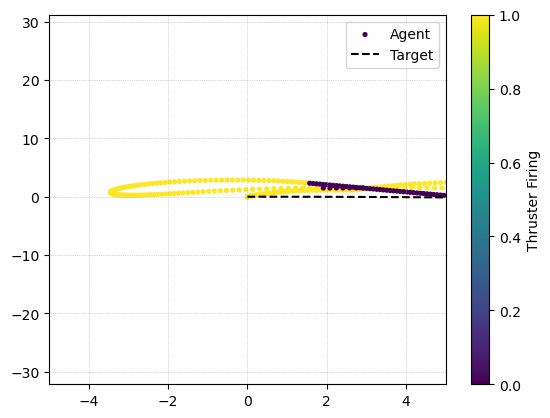

In [102]:
plot_result_and_trajectory(path + '/trajectories/arc.csv', path + '/sim_results/test.csv', coloring='firing')
plt.grid(ls=':', lw=0.5)
plt.xlim(-5, 5)
# plt.ylim(-0.01, 0.01)

plt.show()

In [ ]:
plot_trajectory(path + '/trajectories/sine.csv')

# plt.xlim((-50, 25))
# plt.ylim((0, 100))
plt.grid(ls=':', lw=0.5)
plt.show()

In [ ]:
from plotters import plot_result_and_trajectory

In [ ]:
plot_result_and_trajectory(path + '/trajectories/sine.csv', path + '/sim_results/test.csv', None, 'speed')